In [101]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mplfinance as mpf

BTC_NAV=0.00094976
ETH_NAV=0.01029102
BCH_NAV=0.00931243
ETC_NAV=0.89482441
LTC_NAV=0.09312427

columns = ['Percent Cost', 'Percent SP', 'Percent', 'Close', 'Value']

%matplotlib inline

In [102]:
def get_ticker_history(ticker, period='3y', interval='1d'):
    t = yf.Ticker(ticker)
    return t.history(period=period, interval=interval)

def get_crypto_and_stock(crypto_ticker, stock_ticker, crypto_per_share, period='3y', interval='1d'):
    crypto = get_ticker_history(crypto_ticker, period=period, interval=interval)
    stock = get_ticker_history(stock_ticker, period=period, interval=interval)    

    df = pd.DataFrame({'Value': crypto['Close'] * crypto_per_share})
    df1 = pd.DataFrame({'Percent': (stock['Close'] - df['Value']) / df['Value']})
    df2 = stock.join([df, df1]).dropna()

    return (crypto[crypto.index >= df2.index[0]], df2)

def get_gbtc(period='5y', interval='1d'):
    return get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period=period, interval=interval)

def get_bchg(period='3y', interval='1d'):
    return get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period=period, interval=interval)

def get_ethe(period='3y', interval='1d'):
    return get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period=period, interval=interval)

def get_etcg(period='3y', interval='1d'):
    return get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period=period, interval=interval)

def get_ltcn(period='3y', interval='1d'):
    return get_crypto_and_stock('LTC-USD', 'LTCN', ETC_NAV, period=period, interval=interval)

def get_close_prices(crypto, stock):
    df = pd.DataFrame({'Crypto Close': crypto['Close'], 'Stock Close': stock['Close']}).dropna()
    comp = df.pct_change().dropna()
    return pd.DataFrame({'Crypto Close': df['Crypto Close'],
                         'Stock Close': df['Stock Close'],
                         'Crypto Percent': comp['Crypto Close'],
                         'Stock Percent': comp['Stock Close'],
                         'Stock Gain': comp['Stock Close'] - comp['Crypto Close'],
                         'Stock Outperform': comp['Stock Close'] > comp['Crypto Close'],
                        }).dropna()

def buy_at_25(df, df_sp500, cost=10000):
    df_sp = df_sp500[(df_sp500.index >= df.index[0]) & (df_sp500.index <= df.index[-1])]
    buy_point = df['Percent'] <= df['Percent'].describe()['25%']
    cur_price = df.iloc[-1]['Close']
    cur_price_sp = df_sp.iloc[-1]['Close']
    
    shares = cost / df[buy_point]['Close']
    shares_sp = cost / df_sp[buy_point]['Close']
    values = cur_price * shares
    values_sp = cur_price_sp * shares_sp
    
    df1 = pd.DataFrame({'Shares': shares,
                        'Values': values,
                        'Values SP': values_sp,
                        'Percent Cost': (values - cost) / cost,
                        'Percent SP': (values - values_sp) / values_sp
                       })
    return df1.join(df)

def buy_strategy(df, percentiles=[0.1,0.25,0.3,0.4,0.5]):
    percents = df['Percent'].quantile(percentiles)
    return pd.DataFrame({'Percent': percents, 'Price': df.iloc[-1]['Value'] * (1 + percents)})

def buy_if(df, crypto_price):
    pd.Series()

def draw_candlestick(df, title):
    mpf.plot(df, type='candle', style='yahoo', mav=(5,20,60), volume=True, figsize=(18, 8), title=title)

def draw_premium(df):
    df['Value'].plot(label='Crypto Value', figsize=(18,8))
    df['Close'].plot(label='Stock Value')
    plt.legend()
    plt.show()

def draw_premium_percentage(df):
    plt.ylim([-0.25,1.0])
    df['Percent'].plot.area(figsize=(18,8))
    plt.title('Premium percentage')
    plt.show()

def draw_premium_with_percentage(df, kind='area'):
    fig = plt.figure(figsize=(18,8))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan=5, colspan=1)
    ax1.get_xaxis().set_visible(False)    
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan=3, colspan=1, sharex=ax1)
    df['Value'].plot(ax=ax1, label='Crypto Close')
    df['Close'].plot(ax=ax1, label='Stock Close')
    df['Percent'].plot(ax=ax2, kind=kind)
    ax1.legend()

In [103]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')

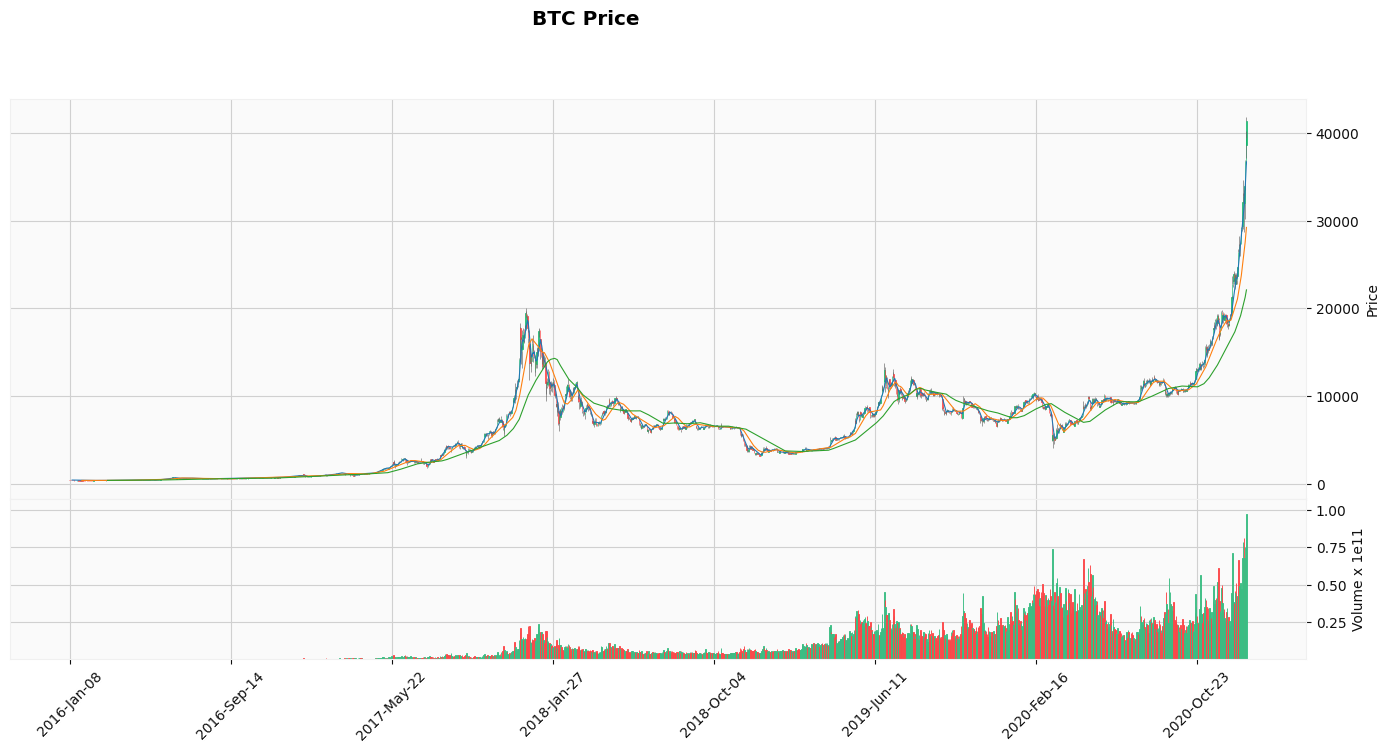

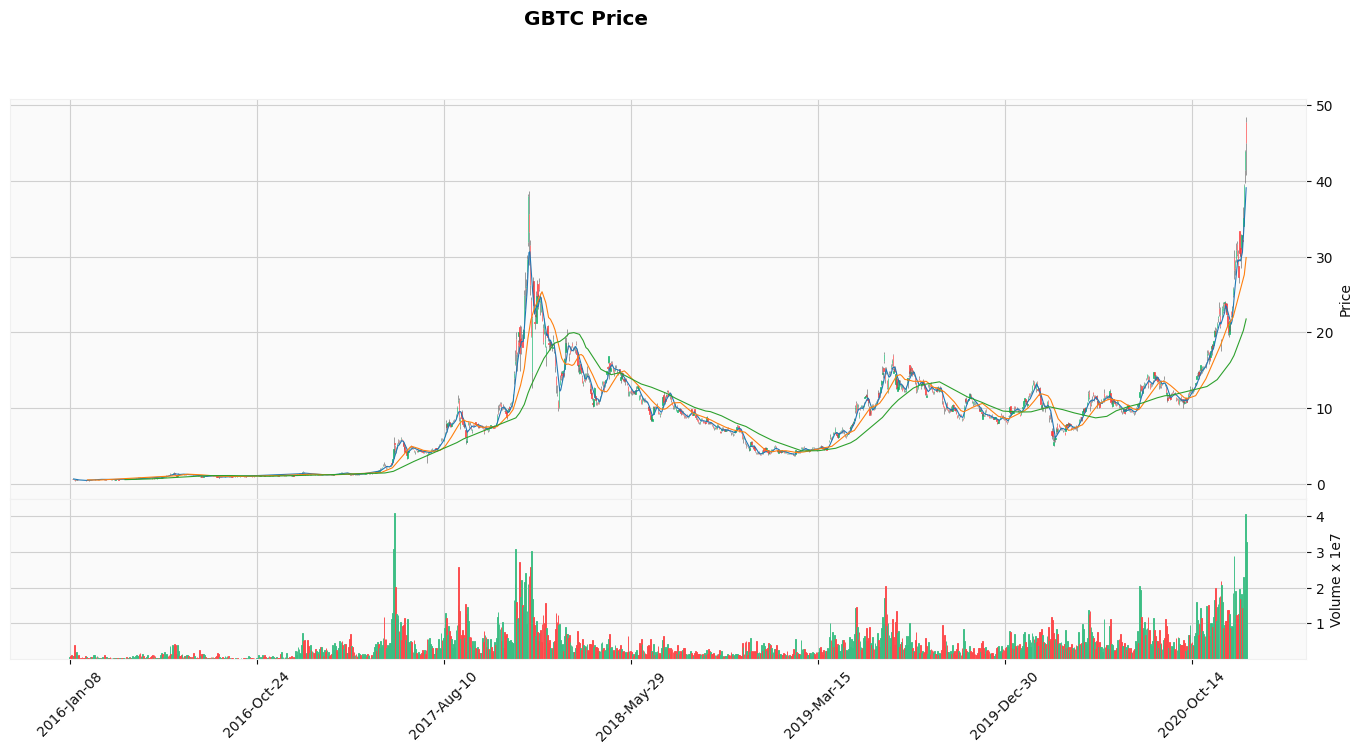

In [104]:
%matplotlib inline
draw_candlestick(btc, 'BTC Price')
draw_candlestick(gbtc, 'GBTC Price')

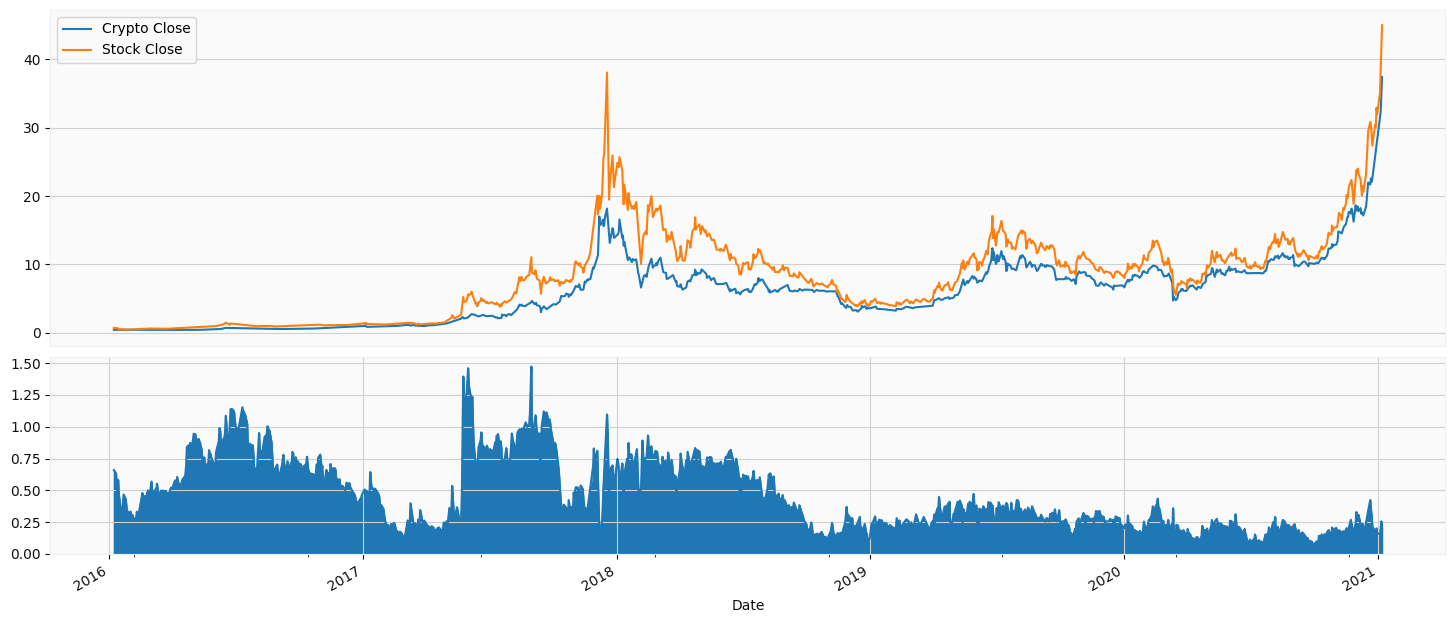

In [105]:
draw_premium_with_percentage(gbtc)

In [106]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')

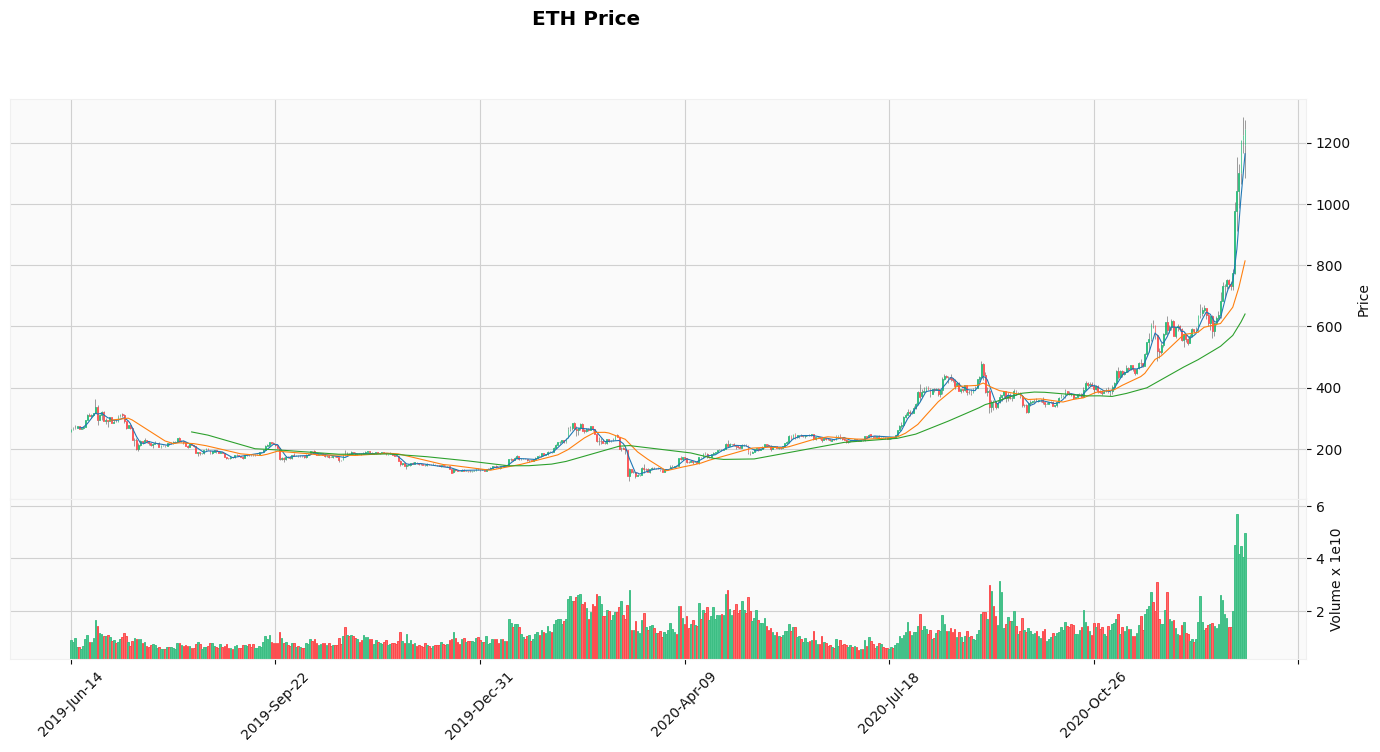

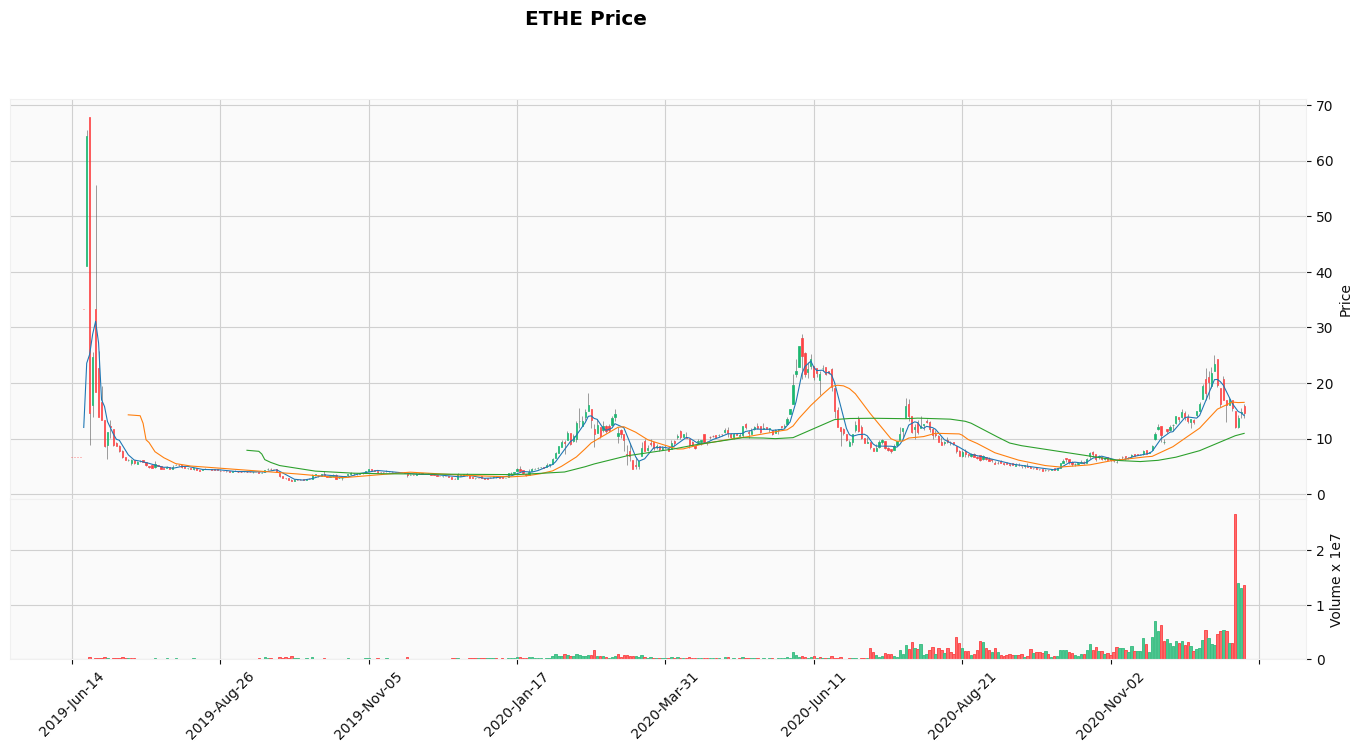

In [107]:
%matplotlib inline
draw_candlestick(eth, 'ETH Price')
draw_candlestick(ethe, 'ETHE Price')

count    396.000000
mean       2.200286
std        2.114431
min        0.120965
25%        0.925350
50%        1.278804
75%        3.385525
max       20.234261
Name: Percent, dtype: float64

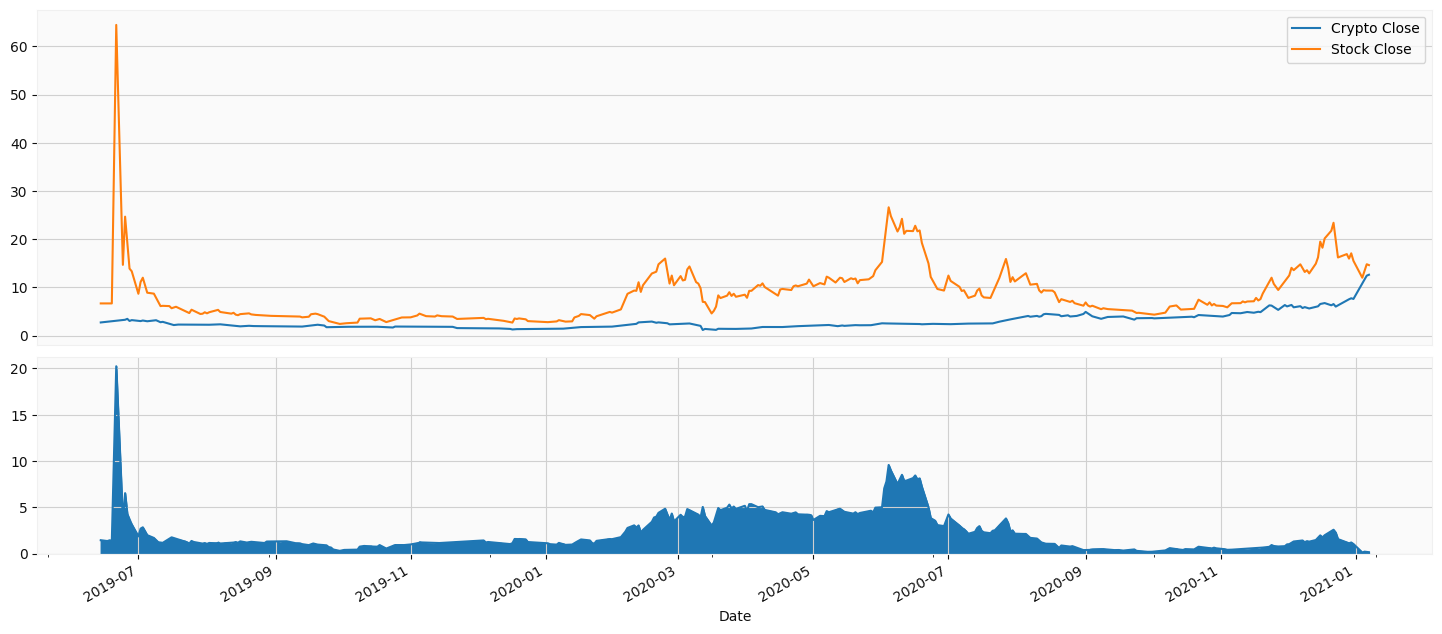

In [108]:
draw_premium_with_percentage(ethe)
ethe['Percent'].describe()

In [109]:
bch, bchg = get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period='3y')

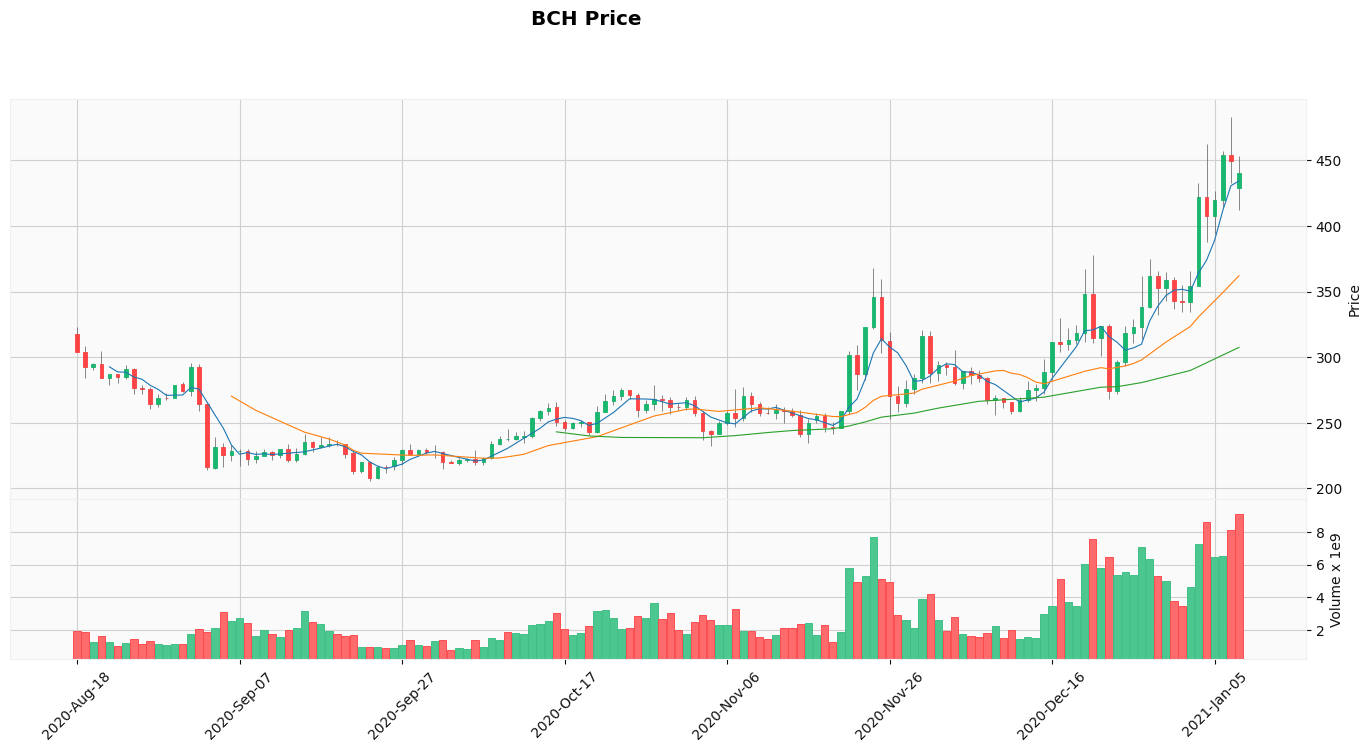

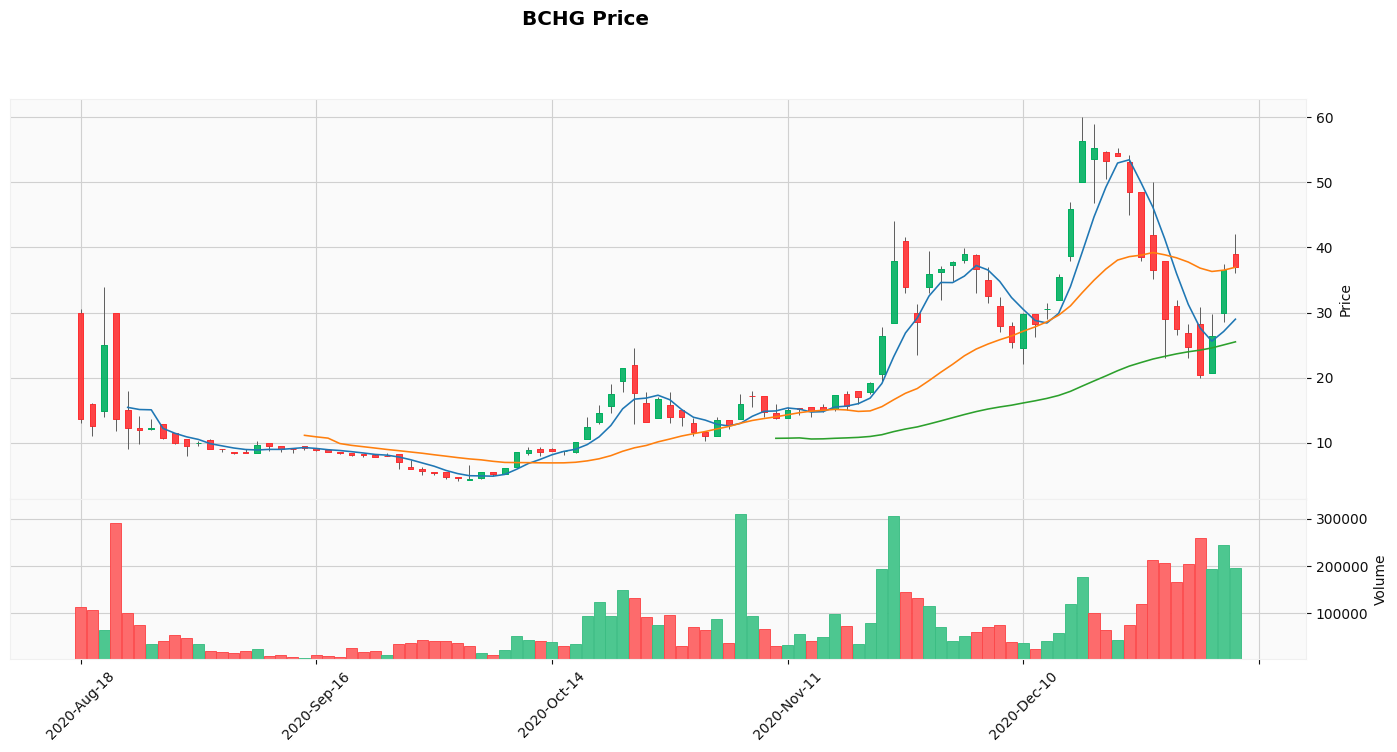

In [110]:
%matplotlib inline
draw_candlestick(bch, 'BCH Price')
draw_candlestick(bchg, 'BCHG Price')

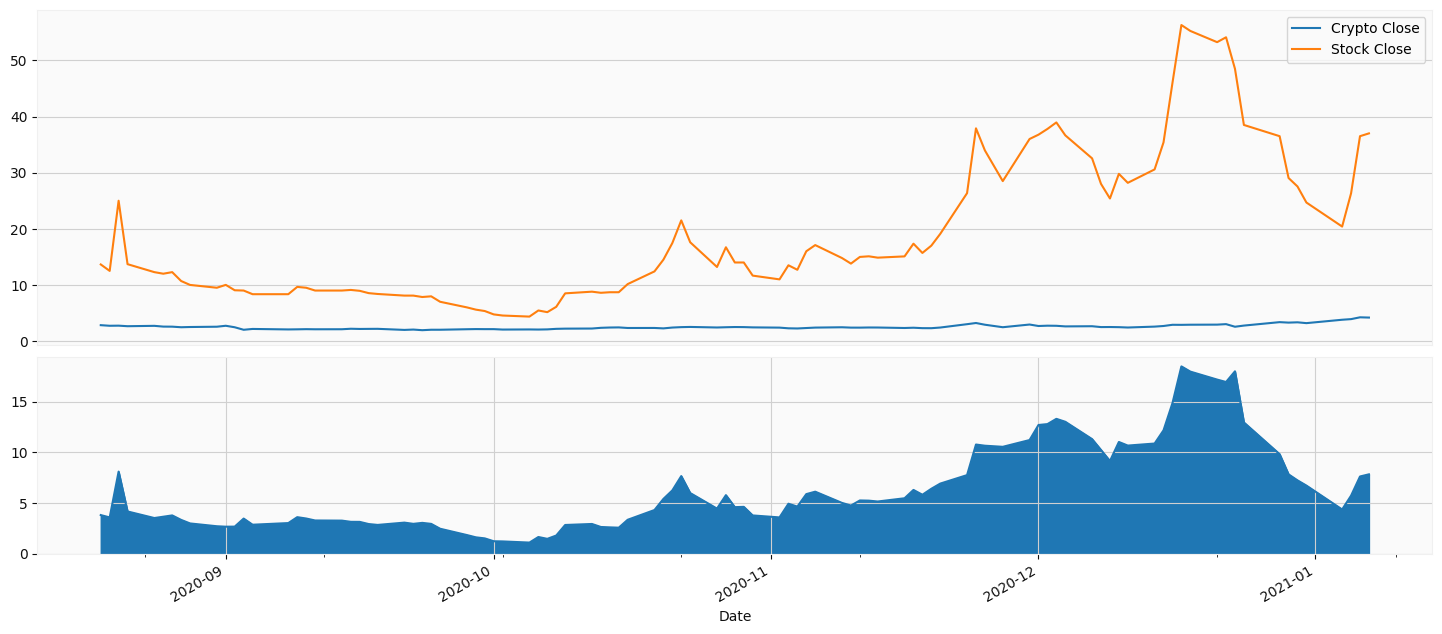

In [111]:
draw_premium_with_percentage(bchg)

In [112]:
etc, etcg = get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period='3y')

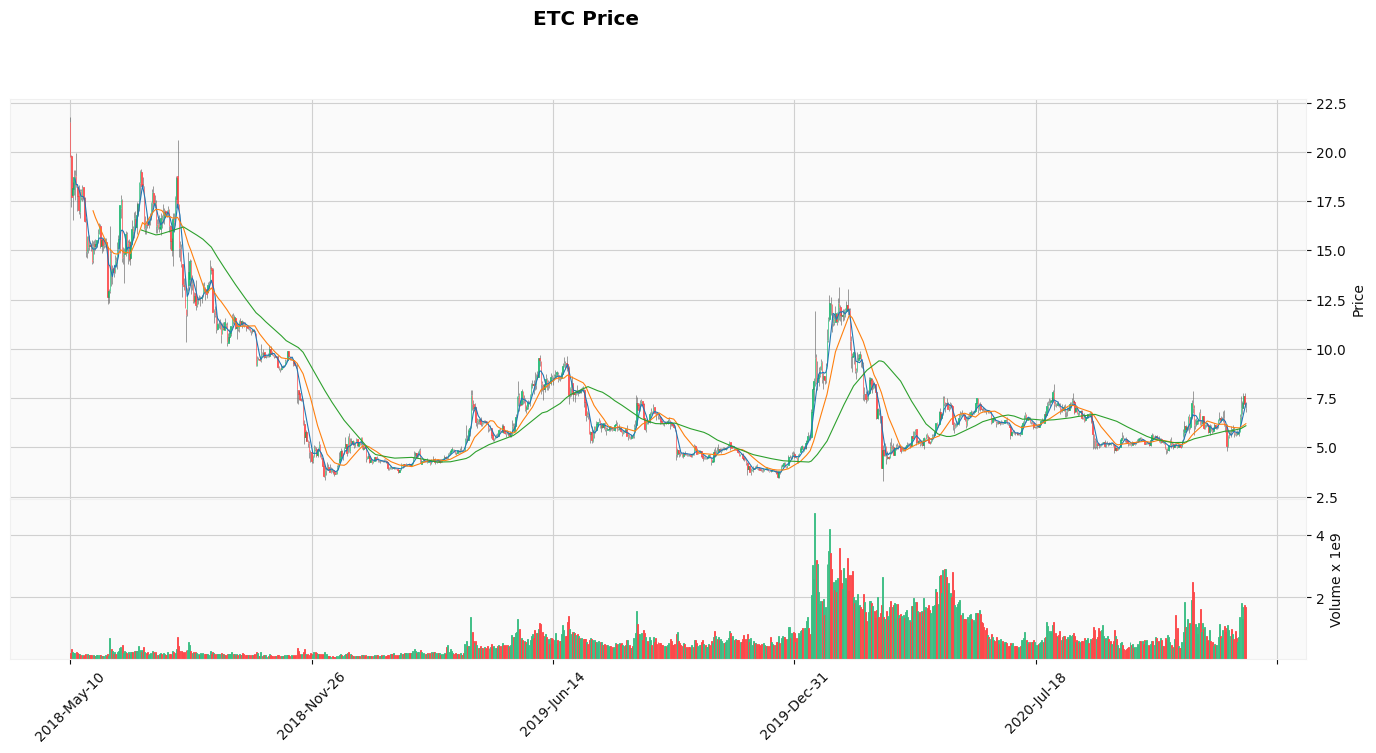

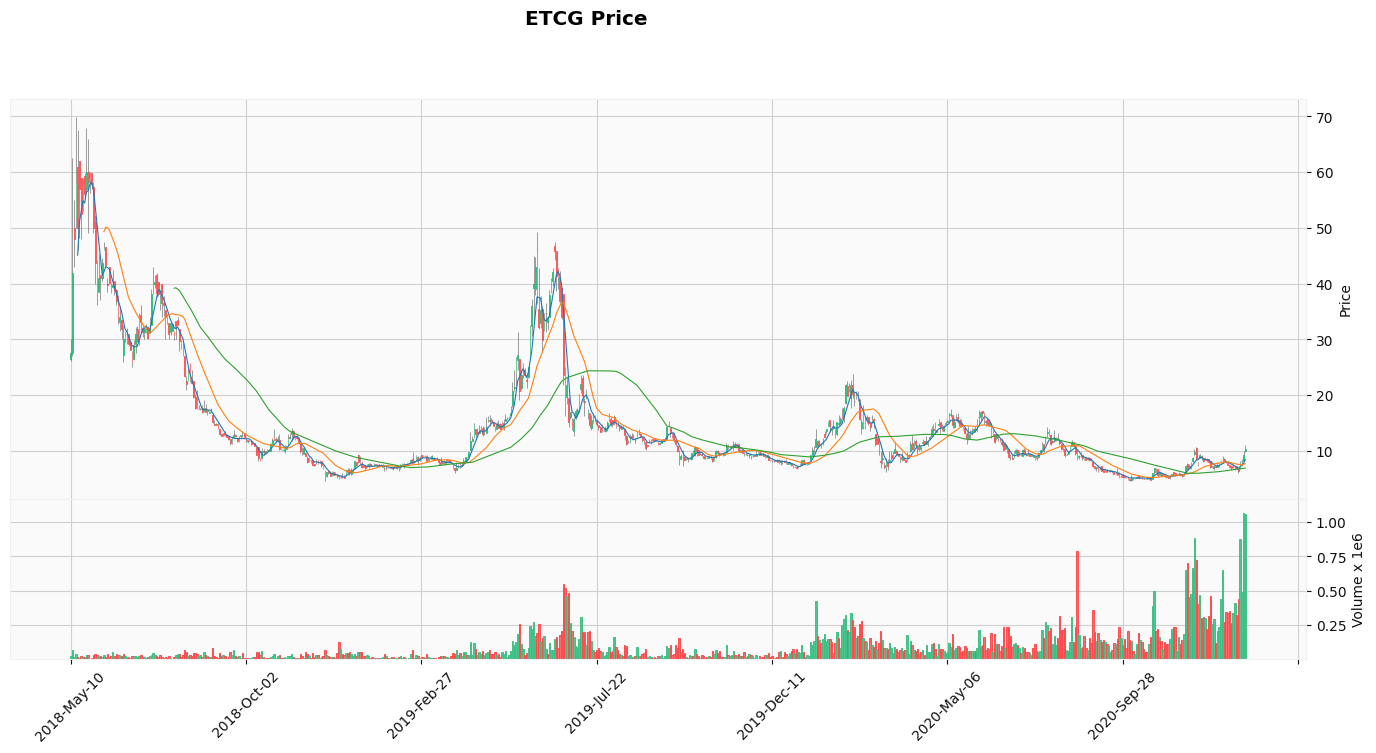

In [113]:
%matplotlib inline
draw_candlestick(etc, 'ETC Price')
draw_candlestick(etcg, 'ETCG Price')

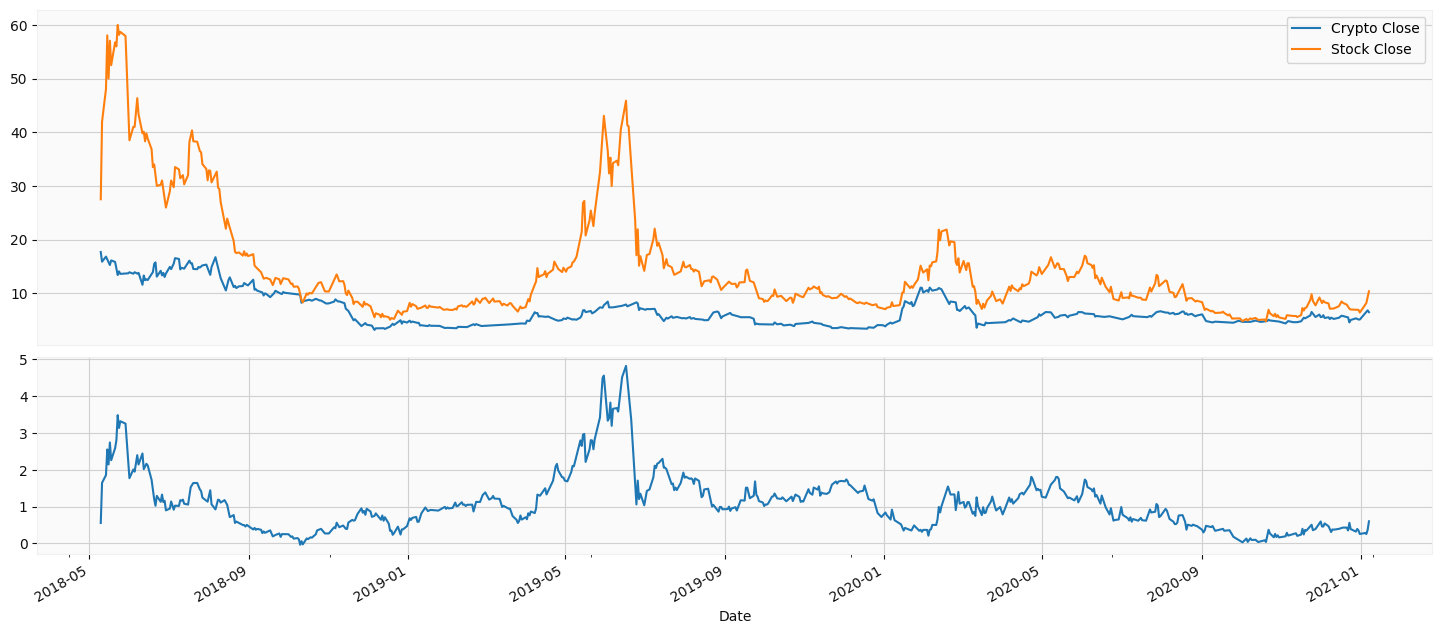

In [114]:
draw_premium_with_percentage(etcg, kind='line')

In [115]:
ltc, ltcn = get_crypto_and_stock('LTC-USD', 'LTCN', LTC_NAV, period='3y')

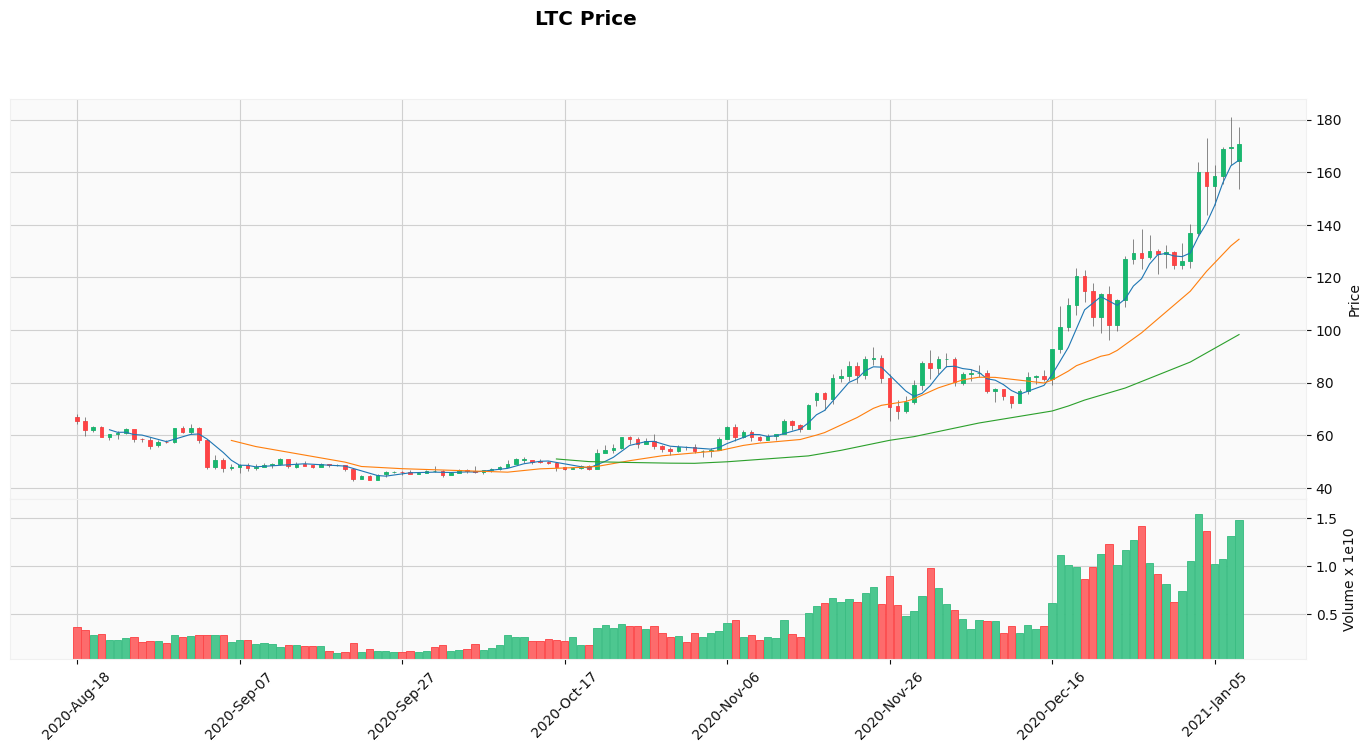

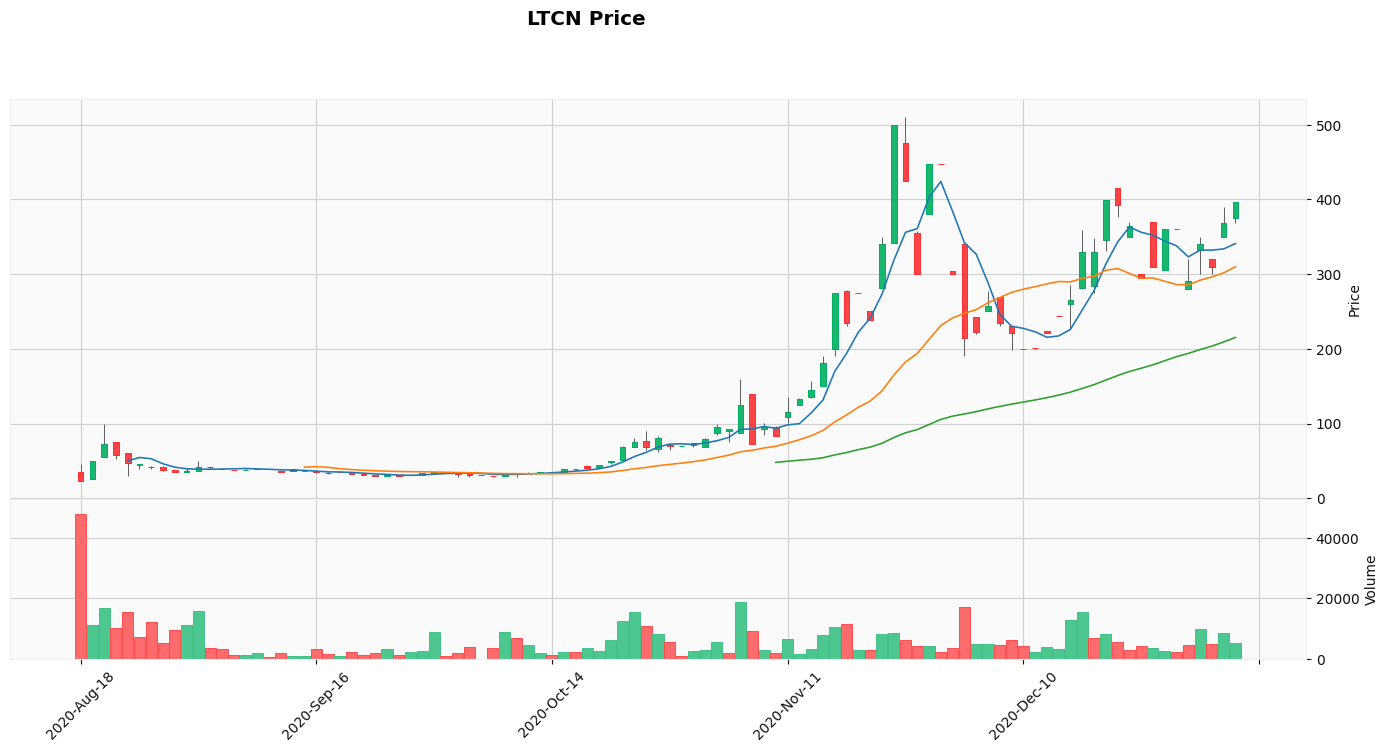

In [116]:
%matplotlib inline
draw_candlestick(ltc, 'LTC Price')
draw_candlestick(ltcn, 'LTCN Price')

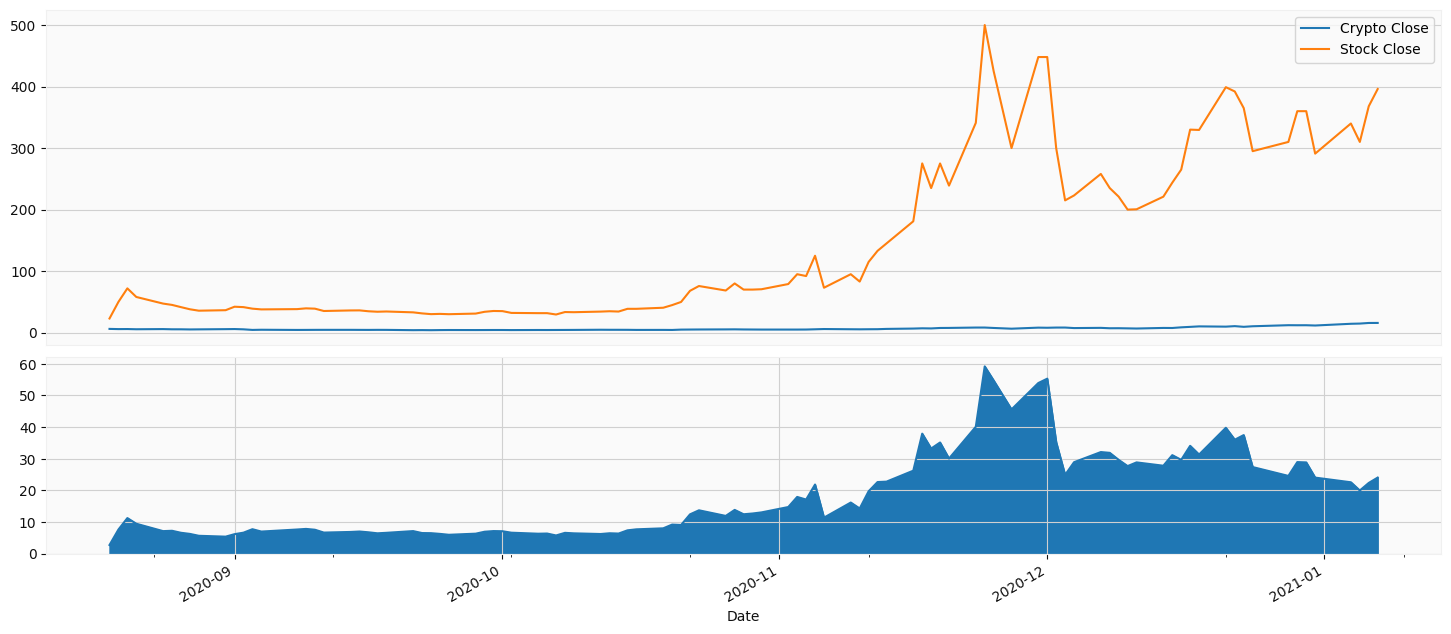

In [117]:
draw_premium_with_percentage(ltcn)

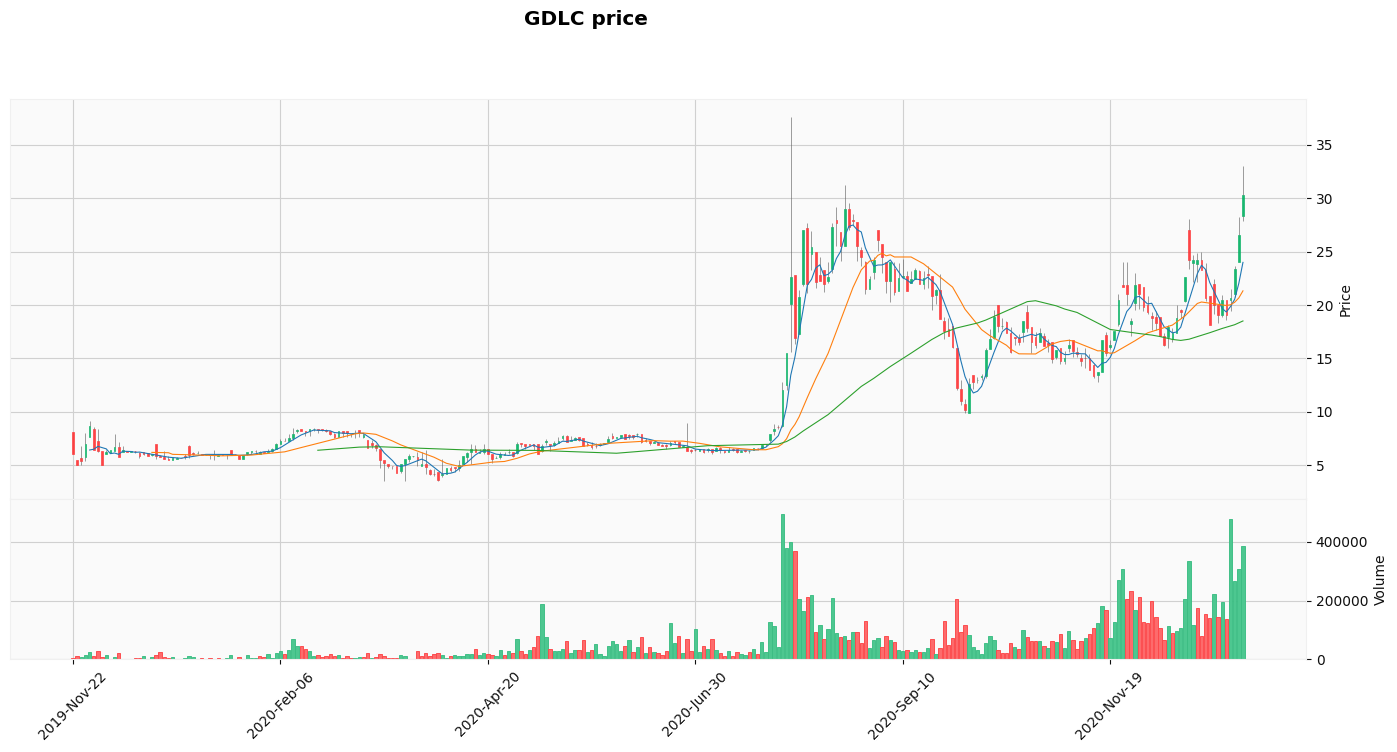

In [118]:
gdlc = get_ticker_history('GDLC')
draw_candlestick(gdlc, 'GDLC price')

In [146]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')
gbtc[gbtc['Percent'] == gbtc['Percent'].min()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2020-04-01,6.8,6.9,6.41,6.495,4274800.0,0.0,0.0,6.274852,0.035084


In [150]:
gbtc[gbtc['Percent'] < 0.16]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2017-02-21,1.225330,1.230769,1.209890,1.219780,3822000.0,0.0,0.0,1.059267,0.151532
2017-02-27,1.296703,1.304945,1.278022,1.285714,2366000.0,0.0,0.0,1.120688,0.147254
2017-02-28,1.285165,1.287912,1.252747,1.263736,1847300.0,0.0,0.0,1.120688,0.127643
2017-03-01,1.280220,1.300769,1.264286,1.286264,3039400.0,0.0,0.0,1.161082,0.107815
2017-03-02,1.313187,1.378571,1.292308,1.378022,4904900.0,0.0,0.0,1.188159,0.159796
...,...,...,...,...,...,...,...,...,...
2020-11-13,18.360001,18.490000,17.600000,17.959999,8926400.0,0.0,0.0,15.498002,0.158859
2020-11-27,18.500000,19.150000,17.600000,18.834999,21926800.0,0.0,0.0,16.248876,0.159157
2020-12-09,20.840000,21.299999,19.600000,20.070000,13717000.0,0.0,0.0,17.621767,0.138932


Empty DataFrame
Columns: [Percent Cost, Percent SP, Percent, Close, Value]
Index: []


count    315.000000
mean       5.011163
std        5.338808
min        0.000000
25%        2.345603
50%        2.889862
75%        5.097412
max       21.459497
Name: Percent SP, dtype: float64

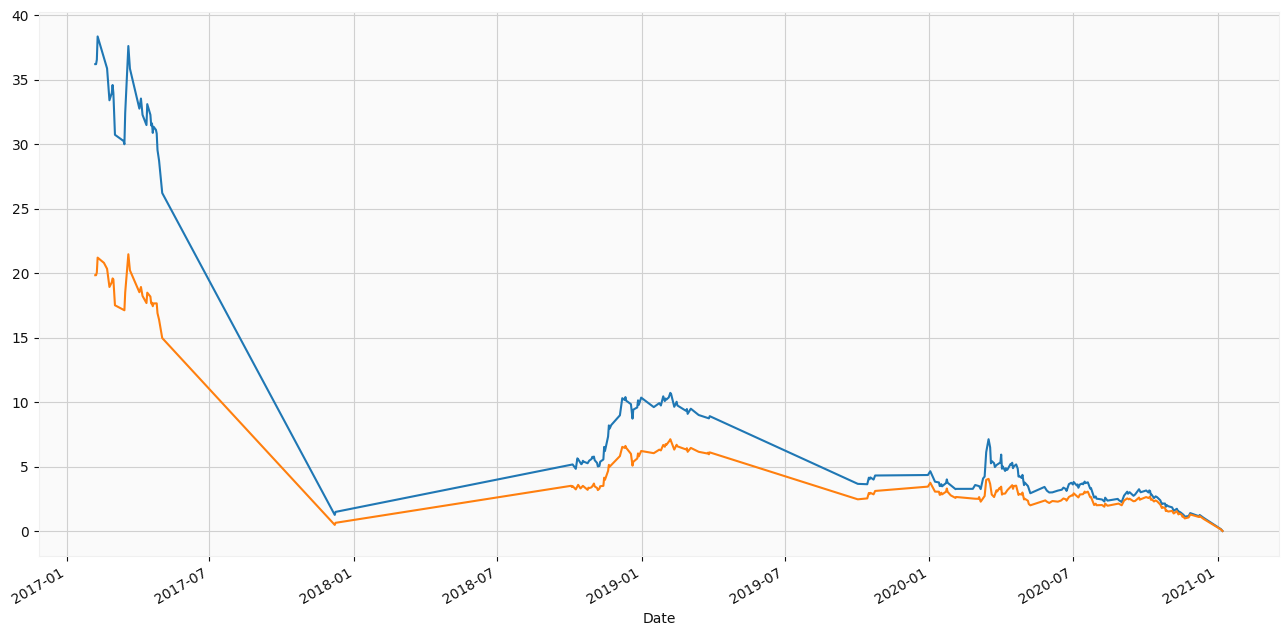

In [121]:
spy = get_ticker_history('SPY', '5y')
df = buy_at_25(gbtc, spy, cost=10000)
df['Percent Cost'].plot(kind='line', figsize=(16, 8))
df['Percent SP'].plot(kind='line', figsize=(16, 8))
df['Percent SP'].describe()
print(df[df['Percent SP'] < 0][columns])
df['Percent SP'].describe()

            Percent Cost  Percent SP   Percent  Close     Value
Date                                                           
2019-01-15      9.681710    6.067441  0.220902  4.210  3.448270
2019-01-16      9.606133    6.034417  0.221416  4.240  3.471379
2019-01-23      9.915049    6.306708  0.209983  4.120  3.405006
2019-01-25      9.732697    6.249282  0.225536  4.190  3.418914
2019-01-28     10.442748    6.670137  0.192320  3.930  3.296095
2019-01-30     10.076355    6.532070  0.226202  4.060  3.311036
2019-01-31     10.270677    6.731522  0.214955  3.990  3.284073
2019-02-01     10.186568    6.677519  0.213508  4.020  3.312711
2019-02-04     10.356061    6.848678  0.205345  3.960  3.285366
2019-02-05     10.530769    7.002834  0.184615  3.900  3.292208
2019-02-06     10.710938    7.117164  0.184359  3.840  3.242260
2019-02-07     10.620156    6.977462  0.198631  3.870  3.228682
2019-02-11      9.631206    6.311496  0.220732  4.230  3.465134
2019-02-13      9.810097    6.554578  0.

count    225.000000
mean       2.857225
std        1.473314
min        0.000000
25%        2.172875
50%        2.577564
75%        3.048690
max        7.117164
Name: Percent SP, dtype: float64

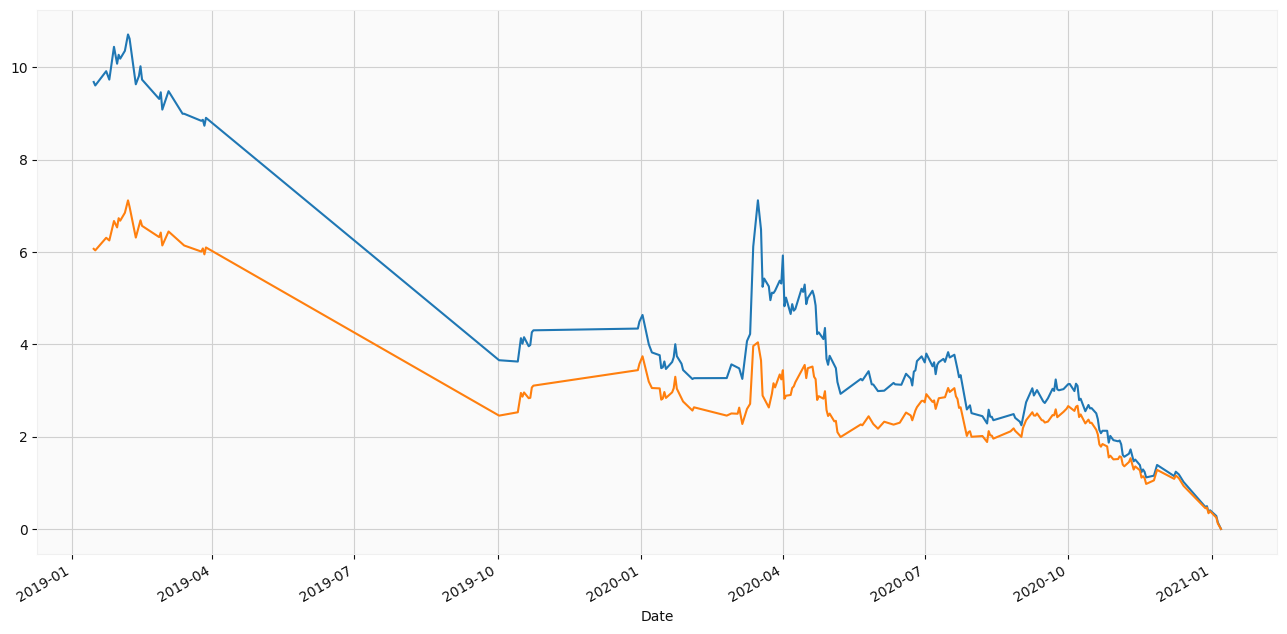

In [122]:
df1 = df.loc[df.index.year >= 2019]
df1['Percent Cost'].plot(kind='line', figsize=(16, 8))
df1['Percent SP'].plot(kind='line', figsize=(16, 8))

print(df1[df1['Percent SP'] >= 4][columns])
print(df1[df1['Percent SP'] == df1['Percent SP'].min()][columns])
df1['Percent SP'].describe()

In [123]:
df.loc[(df.index.year >= 2020) & (df.index.month >= 12)][columns]

,Percent Cost,Percent SP,Percent,Close,Value
Date,,,,,
2020-12-08,1.145515,1.086084,0.204550,20.959999,17.400690
2020-12-09,1.240658,1.159051,0.138932,20.070000,17.621767
2020-12-11,1.181951,1.099330,0.201635,20.610001,17.151625
2020-12-14,1.019309,0.934148,0.218292,22.270000,18.279693
2020-12-24,0.644241,0.600435,0.213212,27.350000,22.543455
2020-12-28,0.476847,0.449850,0.183716,30.450001,25.724068
2020-12-29,0.495013,0.464884,0.157468,30.080000,25.987749
2020-12-30,0.366869,0.341234,0.201081,32.900002,27.391984
2020-12-31,0.405313,0.385962,0.161749,32.000000,27.544674


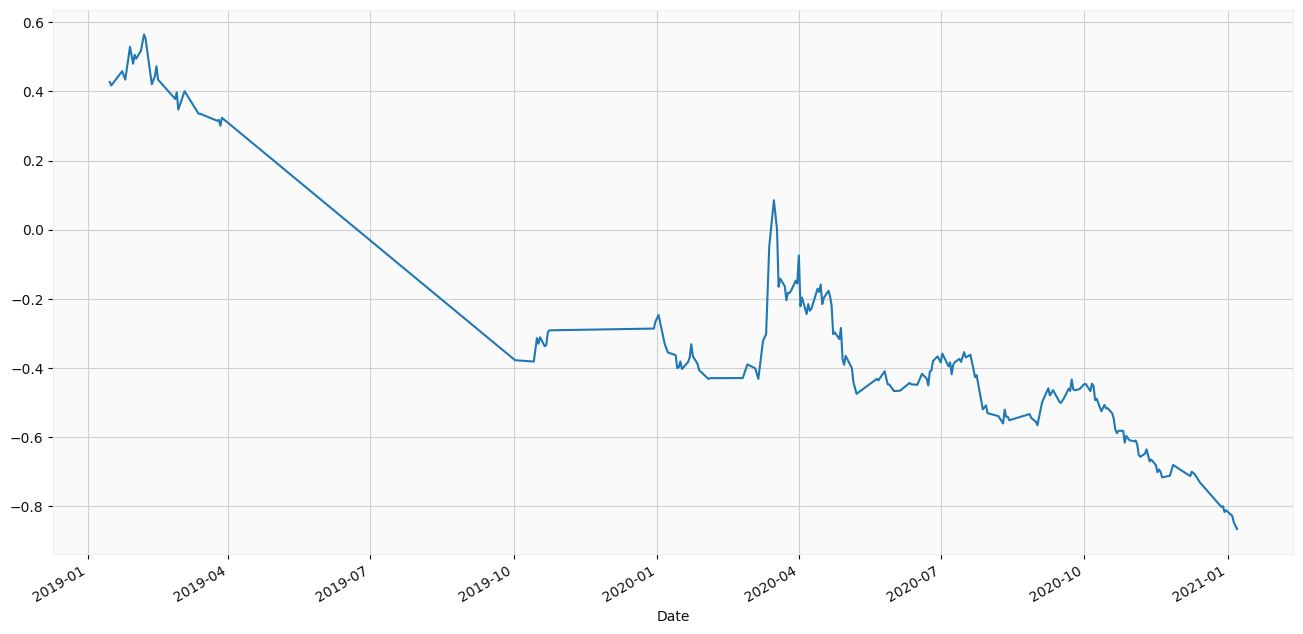

In [124]:
def buy_at_25_bear(df, cost=10000):
    buy_point = df['Percent'] <= df['Percent'].describe()['25%']
    cur_price = gbtc.loc['2020-03-18']['Close']
    shares = cost / df[buy_point]['Close']
    values = cur_price * shares
    
    df1 = pd.DataFrame({'Shares': shares, 'Values': values, 'Percent': (values - cost) / cost})
    return df1
df = buy_at_25_bear(gbtc, cost=10000)
df.loc[df.index.year >= 2019]['Percent'].plot(figsize=(16, 8))

,Crypto Close,Stock Close,Crypto Percent,Stock Percent,Stock Gain
Crypto Close,1.000000,0.966416,0.078292,0.060442,0.000439
Stock Close,0.966416,1.000000,0.070881,0.079556,0.035667
Crypto Percent,0.078292,0.070881,1.000000,0.712216,-0.079288
Stock Percent,0.060442,0.079556,0.712216,1.000000,0.643280
Stock Gain,0.000439,0.035667,-0.079288,0.643280,1.000000


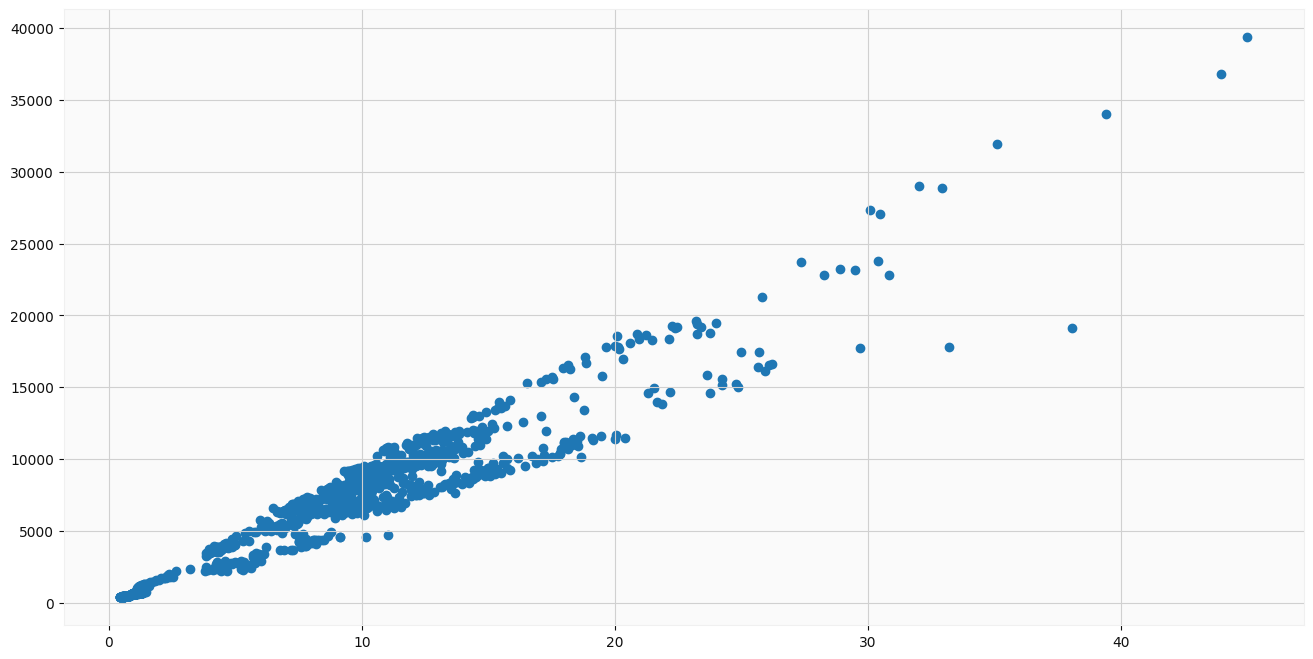

In [125]:
df = get_close_prices(btc, gbtc)
plt.figure(figsize=(16,8))
plt.scatter(df['Stock Close'], df['Crypto Close'])
df.corr()

count    1258.000000
mean        0.000460
std         0.042758
min        -0.244083
25%        -0.021272
50%        -0.001903
75%         0.021004
max         0.358462
Name: Stock Gain, dtype: float64
False    664
True     594
Name: Stock Outperform, dtype: int64


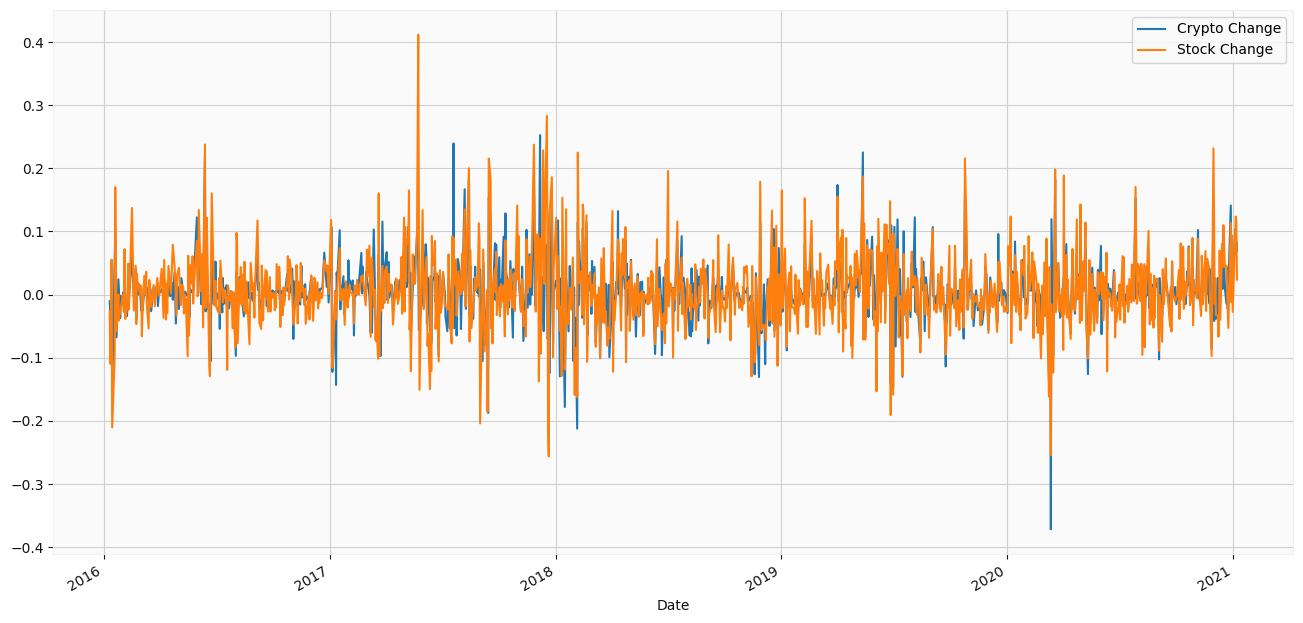

In [126]:
print(df['Stock Gain'].describe())
print(df['Stock Outperform'].value_counts())
df['Crypto Percent'].plot(label='Crypto Change', figsize=(16,8))
df['Stock Percent'].plot(label='Stock Change')
plt.legend()

In [128]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='2d', interval='1m')

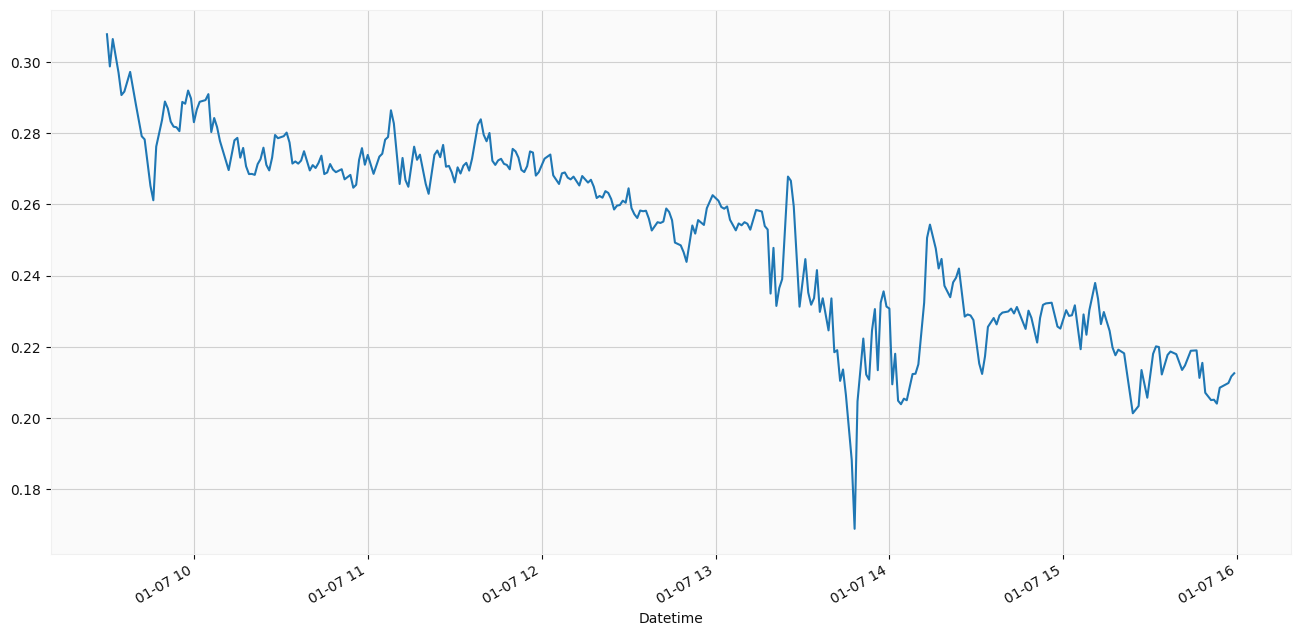

In [129]:
gbtc['Percent'].plot(figsize=(16,8))

In [130]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')
gbtc.iloc[-1]['Value'] / (1- gbtc['Percent'].quantile([0.1,0.15,0.2,0.25,0.3,0.4,0.5]))
# np.roots([0, (1- .22), gbtc.iloc[-1]['Value']])


0.10    44.779749
0.15    46.067503
0.20    47.258352
0.25    48.356851
0.30    49.541821
0.40    52.431905
0.50    58.028663
Name: Percent, dtype: float64

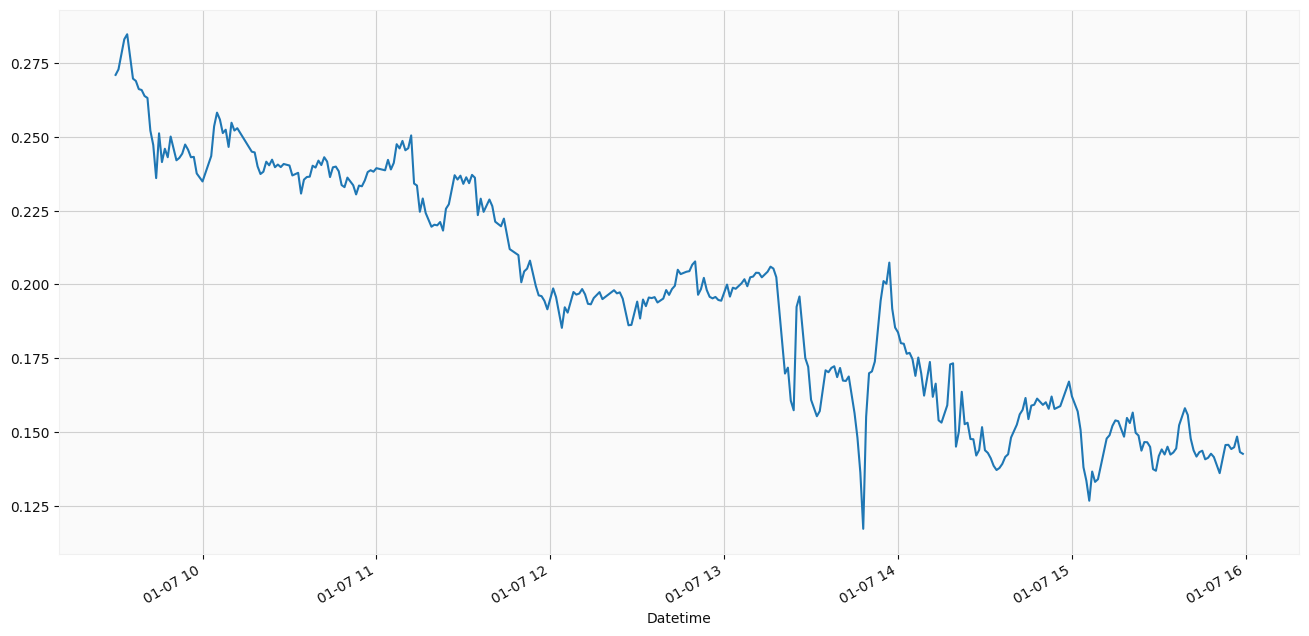

In [133]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='2d', interval='1m')
ethe['Percent'].plot(figsize=(16,8))

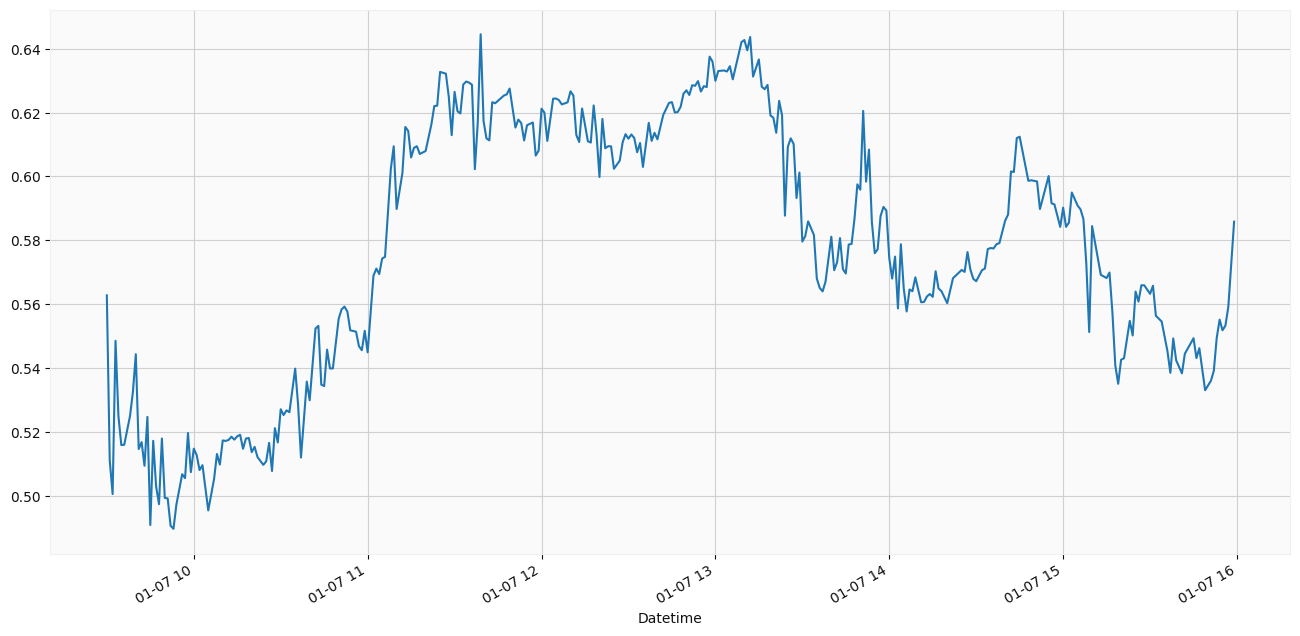

In [134]:
etc, etcg = get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period='2d', interval='1m')
etcg['Percent'].plot(figsize=(16,8))

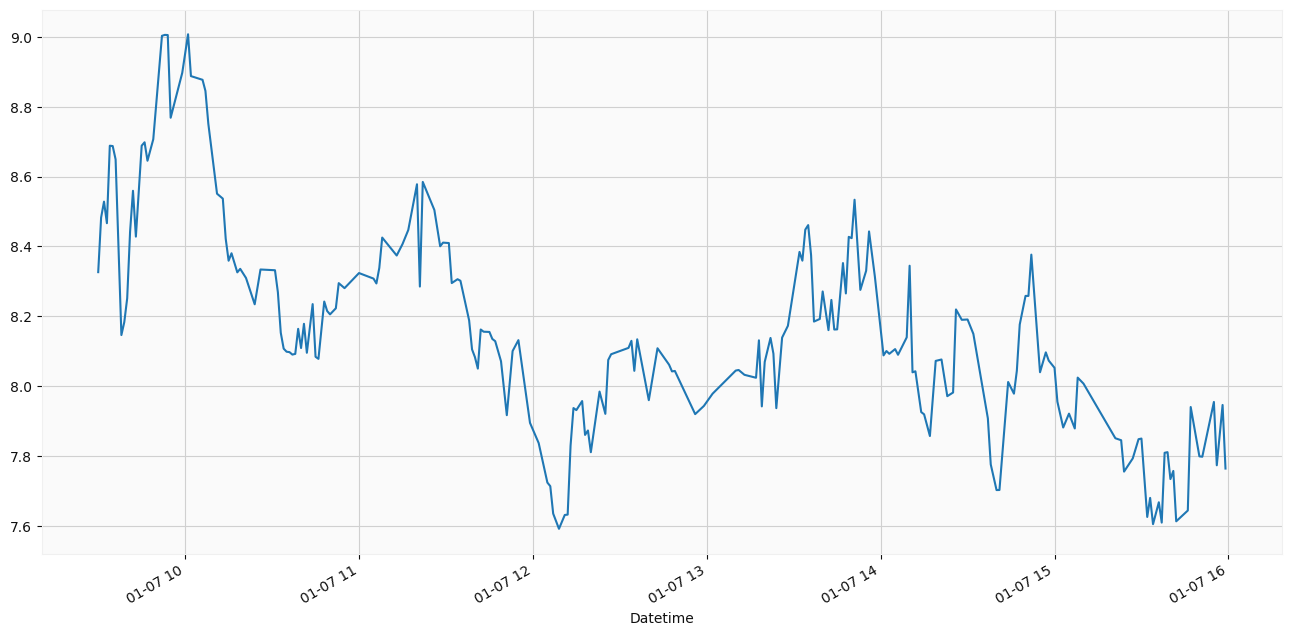

In [135]:
bch, bchg = get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period='2d', interval='1m')
bchg['Percent'].plot(figsize=(16,8))

,Crypto Close,Stock Close,Crypto Percent,Stock Percent,Stock Gain
Crypto Close,1.000000,0.618332,0.055460,-0.055113,-0.081221
Stock Close,0.618332,1.000000,0.085891,0.051679,0.007237
Crypto Percent,0.055460,0.085891,1.000000,0.198041,-0.307576
Stock Percent,-0.055113,0.051679,0.198041,1.000000,0.871765
Stock Gain,-0.081221,0.007237,-0.307576,0.871765,1.000000


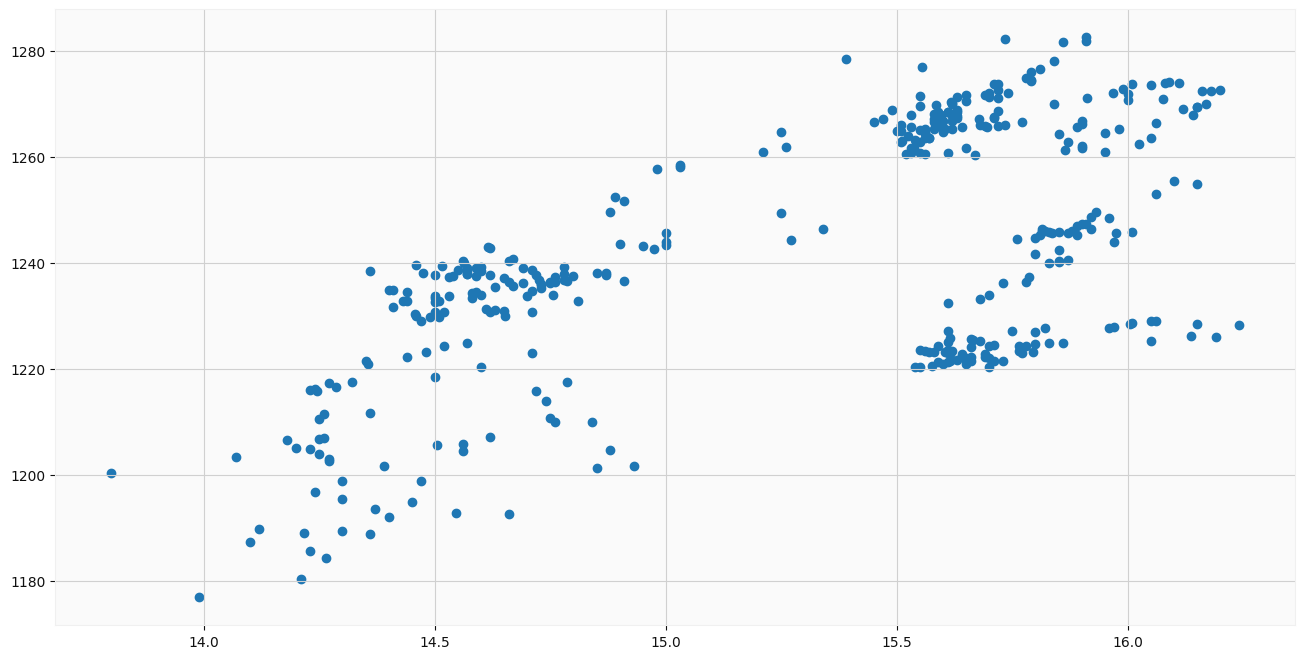

In [136]:
df = get_close_prices(eth, ethe)
plt.figure(figsize=(16,8))
plt.scatter(df['Stock Close'], df['Crypto Close'])
df.corr()

count    99.000000
mean      1.501601
std       0.836805
min      -0.026299
25%       0.959381
50%       1.327034
75%       1.924068
max       3.633212
Name: Percent SP, dtype: float64

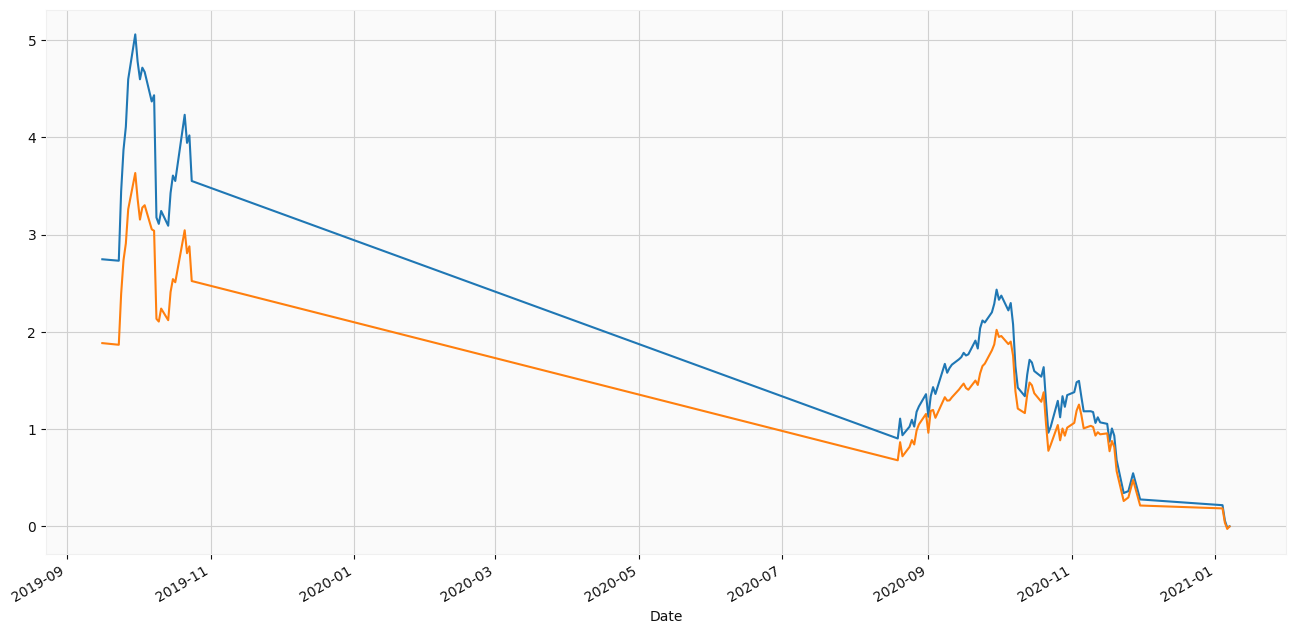

In [145]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')
df = buy_at_25(ethe, spy, cost=10000)
df['Percent Cost'].plot(kind='line', figsize=(16, 8))
df['Percent SP'].plot(kind='line', figsize=(16, 8))
df['Percent SP'].describe()

            Percent Cost  Percent SP   Percent     Close     Value
Date                                                              
2020-09-30      2.434334    2.020951  0.148599  4.255556  3.704997
            Percent Cost  Percent SP  Percent  Close      Value
Date                                                           
2021-01-06     -0.011832   -0.026299  0.19059  14.79  12.422416


count    75.000000
mean      1.112882
std       0.465677
min      -0.026299
25%       0.881283
50%       1.116408
75%       1.405698
max       2.020951
Name: Percent SP, dtype: float64

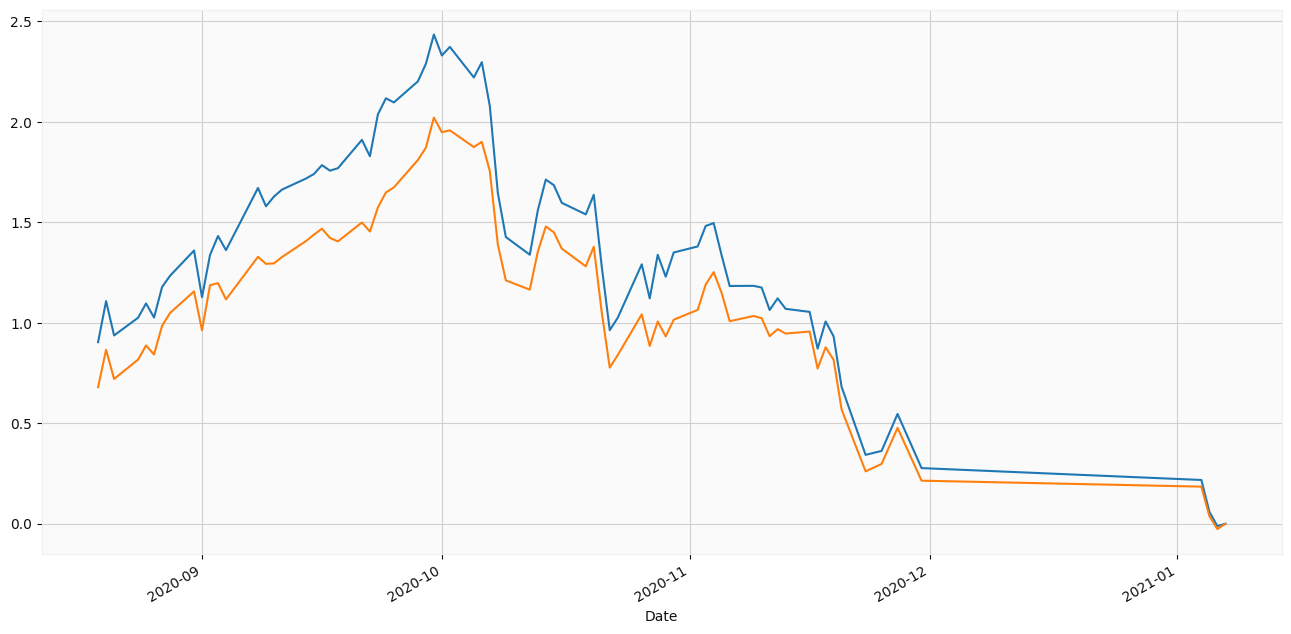

In [139]:
df1 = df.loc[df.index.year >= 2020]
df1['Percent Cost'].plot(kind='line', figsize=(16, 8))
df1['Percent SP'].plot(kind='line', figsize=(16, 8))
columns = ['Percent Cost', 'Percent SP', 'Percent', 'Close', 'Value']
print(df1[df1['Percent SP'] >= 2][columns])
print(df1[df1['Percent SP'] == df1['Percent SP'].min()][columns])
df1['Percent SP'].describe()

In [140]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')
print('BTC:', btc.iloc[-1]['Close'], 'GBTC:', gbtc.iloc[-1]['Close'], 'NAV:', btc.iloc[-1]['Close'] * BTC_NAV)
buy_strategy(gbtc, [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5])

BTC: 41325.3046875 GBTC: 44.970001220703125 NAV: 39.24912138


,Percent,Price
0.10,0.164956,43.561264
0.15,0.188299,44.434111
0.20,0.208753,45.198941
0.25,0.226727,45.871058
0.30,0.245223,46.562664
0.40,0.286827,48.118360
0.50,0.355611,50.690413


In [141]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')
print('ETH:', eth.iloc[-1]['Close'], 'ETHE:', ethe.iloc[-1]['Close'], 'NAV:', eth.iloc[-1]['Close'] * ETH_NAV)
buy_strategy(ethe, [0.001, 0.003, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5])

ETH: 1246.0048828125 ETHE: 14.614999771118164 NAV: 12.822661169121094


,Percent,Price
0.001,0.131881,14.276950
0.003,0.150464,14.511353
0.010,0.199318,15.127573
0.050,0.384726,17.466214
0.100,0.457978,18.390178
0.150,0.566659,19.761015
0.200,0.741834,21.970591
0.250,0.925350,24.285365
0.300,1.050305,25.861476
0.400,1.162117,27.271817


In [142]:
bch, bchg = get_crypto_and_stock('BCH-USD', 'BCHG', ETH_NAV, period='1y')
print('BCH:', bch.iloc[-1]['Close'], 'BCHG:', bchg.iloc[-1]['Close'], 'NAV:', bch.iloc[-1]['Close'] * BCH_NAV)
buy_strategy(bchg, [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5])

BCH: 441.35382080078125 BCHG: 37.0 NAV: 4.110076561439819


,Percent,Price
0.10,2.215343,14.875852
0.15,2.352586,15.510808
0.20,2.563047,16.484512
0.25,2.655240,16.911045
0.30,2.870146,17.905313
0.40,3.235614,19.596156
0.50,4.117924,23.678184


In [143]:
ethe

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2019-06-14,6.666667,6.666667,6.666667,6.666667,900.0,0.0,0.0,2.717729,1.453028
2019-06-17,6.666667,6.666667,6.666667,6.666667,0.0,0.0,0.0,2.823353,1.361259
2019-06-18,6.666667,6.666667,6.666667,6.666667,0.0,0.0,0.0,2.727654,1.444103
2019-06-19,6.666667,6.666667,6.666667,6.666667,0.0,0.0,0.0,2.772728,1.404371
2019-06-20,33.333332,33.333332,33.333332,33.333332,7200.0,0.0,0.0,2.796019,10.921713
...,...,...,...,...,...,...,...,...,...
2020-12-31,16.900000,16.910000,14.900000,15.500000,3031700.0,0.0,0.0,7.592750,1.041421
2021-01-04,15.000000,15.000000,11.990000,12.000000,26692800.0,0.0,0.0,10.705059,0.120965
2021-01-05,12.000000,14.180000,11.990000,13.790000,14028600.0,0.0,0.0,11.320185,0.218178


In [144]:
(BTC_NAV - 0.00094991) / 0.00094991

-0.0001579096967080845